<a href="https://colab.research.google.com/github/ReaganTiburan/Sales-Prediction/blob/main/Sales_Predection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mount Drive, Import Libraries, Load our Dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn import set_config
set_config(display = 'diagram')
from sklearn.metrics  import r2_score, mean_absolute_error, mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [3]:
filename = '/content/drive/MyDrive/Coding Dojo Project/Coding Dojo/02 Week 2: Pandas/03_Attachments/sales_predictions.csv'
df = pd.read_csv(filename)
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## 1) How many rows and columns?

In [4]:
df.shape

(8523, 12)

# 2) What are the datatypes of each variable?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 3) Are there duplicates? If so, drop any duplicates.

In [6]:
df.duplicated().sum()

0

# 4) Identify missing values.

In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

# 5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [8]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


(8523, 12)

## Addressing Null Values on column 'Item_Weight'

In [9]:
df[df['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [10]:
df[df['Item_Identifier'] == 'FDP10'] 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [11]:
filtered_df = df[df['Item_Weight'].notnull()] # filter all non-Null values at column 'Item_Weight'
filtered_df.info()
filtered_df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


(7060, 12)

In [12]:
selected = filtered_df[['Item_Identifier','Item_Weight']] # Create a New DataFrame containing the 2 columns only.
selected.duplicated().sum()

5505

In [13]:
unique = selected.drop_duplicates(subset=['Item_Identifier', 'Item_Weight']) # delete duplicate values
unique.info()
unique.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555 entries, 0 to 8471
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Item_Identifier  1555 non-null   object 
 1   Item_Weight      1555 non-null   float64
dtypes: float64(1), object(1)
memory usage: 36.4+ KB


(1555, 2)

In [14]:
unique.set_index('Item_Identifier', inplace=True) # Assigning column 'Item_Identifier' as the Index
df['Temp']=df.Item_Identifier.map(unique.Item_Weight) # code for vlookup from two DataFrames
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Temp
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


Check Temp Value Column is Added with Values.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Temp                       8519 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [16]:
df[df['Temp'].isna()] # Filter NaN value at column Temp

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Temp
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


In [17]:
df = df[df['Temp'].notna()] # Drop remaining 4 rows with Nan Value at column Temp

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8519 non-null   object 
 3   Item_Visibility            8519 non-null   float64
 4   Item_Type                  8519 non-null   object 
 5   Item_MRP                   8519 non-null   float64
 6   Outlet_Identifier          8519 non-null   object 
 7   Outlet_Establishment_Year  8519 non-null   int64  
 8   Outlet_Size                6109 non-null   object 
 9   Outlet_Location_Type       8519 non-null   object 
 10  Outlet_Type                8519 non-null   object 
 11  Item_Outlet_Sales          8519 non-null   float64
 12  Temp                       8519 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

In [19]:
df.drop(['Item_Weight'], axis=1, inplace=True) # Drop column 'Item_Weight'

In [20]:
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Temp
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [21]:
df.rename(columns = {'Temp':'Item_Weight'}, inplace = True) # Rename column 'Temp' to 'Item_Weight by dictionary key-value pairs.
df

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.920
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.500
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.930
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,6.865
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,8.380
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,10.600
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,7.210


In [22]:
df.isna().sum()

Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_Weight                     0
dtype: int64

## Addressing Null Values on column 'Outlet_Size'

Based on Below DataFrame we can confidently assume that if:

**'Outlet_Location_Type'** => *Tier 2* the corresponding **'Outlet_Size'** => 'Small'

LikeWise condfidently assume that if the:

 **Outlet_Type** =>* Grocery* Store the corresponding 'Outlet_Size' => 'Small'** 

**Therefore: we can increase our confident to assume that all Null/NaN values in the Outlet_Size => 'Small'**

In [23]:
outlet_notNull= df[df['Outlet_Size'].notnull()] # Filter non-Null values
#outlet_notNull.head()
outlet_notNull.groupby(['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Location_Type','Outlet_Type','Outlet_Size'])[['Outlet_Type']].count() # specify which column will be included to apply and aggregate function on

,,,,,Outlet_Type
Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Outlet_Size,
OUT013,1987,Tier 3,Supermarket Type1,High,932
OUT018,2009,Tier 3,Supermarket Type2,Medium,928
OUT019,1985,Tier 1,Grocery Store,Small,527
OUT027,1985,Tier 3,Supermarket Type3,Medium,932
OUT035,2004,Tier 2,Supermarket Type1,Small,930
OUT046,1997,Tier 1,Supermarket Type1,Small,930
OUT049,1999,Tier 1,Supermarket Type1,Medium,930


In [24]:
outlet_isNUll= df[df['Outlet_Size'].isnull()] # Filter Null values
#outlet_isNUll.head()
outlet_isNUll.groupby(['Outlet_Location_Type','Outlet_Type'])[['Outlet_Type']].count() # specify which column will be included to apply and aggregate function on

,,Outlet_Type
Outlet_Location_Type,Outlet_Type,
Tier 2,Supermarket Type1,1855
Tier 3,Grocery Store,555


In [25]:
df['Outlet_Size'] = df['Outlet_Size'].fillna('Small') # Fill the column 'Outlet_Size which contains NaN values with a string 'Small'
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Fat_Content           8519 non-null   object 
 2   Item_Visibility            8519 non-null   float64
 3   Item_Type                  8519 non-null   object 
 4   Item_MRP                   8519 non-null   float64
 5   Outlet_Identifier          8519 non-null   object 
 6   Outlet_Establishment_Year  8519 non-null   int64  
 7   Outlet_Size                8519 non-null   object 
 8   Outlet_Location_Type       8519 non-null   object 
 9   Outlet_Type                8519 non-null   object 
 10  Item_Outlet_Sales          8519 non-null   float64
 11  Item_Weight                8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


# 6) Confirm that there are no missing values after addressing them.

In [26]:
df.isna().sum() # Show that no NaN values in the DataFrame

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_Weight                  0
dtype: int64

# 7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [27]:
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [28]:
df.groupby(['Item_Fat_Content']).sum()


,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
Item_Fat_Content,,,,,
LF,21.054330,43857.1062,631348,6.552424e+05,4095.435
Low Fat,326.461176,717270.7954,10165059,1.101059e+07,66020.930
Regular,200.617851,409116.0404,5765712,6.452310e+06,36636.710
low fat,7.313655,15071.7328,223539,2.338270e+05,1411.150
reg,7.764190,15948.6810,233923,2.295765e+05,1521.480


In [29]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [30]:
#df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat') 
df['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'},inplace=True) 

In [31]:
df.groupby(['Item_Fat_Content']).sum()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
Item_Fat_Content,,,,,
Low Fat,354.829161,776199.6344,11019946,1.189966e+07,71527.515
Regular,208.382041,425064.7214,5999635,6.681887e+06,38158.190


# 8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [32]:
df.describe()

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Weight
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,0.066112,141.010019,1997.837892,2181.188779,12.875420
std,0.051586,62.283594,8.369105,1706.511093,4.646098
min,0.000000,31.290000,1985.000000,33.290000,4.555000
25%,0.026983,93.844900,1987.000000,834.247400,8.785000
50%,0.053925,143.047000,1999.000000,1794.331000,12.650000
75%,0.094558,185.676600,2004.000000,3100.630600,16.850000
max,0.328391,266.888400,2009.000000,13086.964800,21.350000


# Project 1- Part 4 (Core) 

## Code and Graph below will show Total count of sold Item Type.
##It seems that Fruits and Vegetables are the most bought item.

In [33]:
# groupby columns
items = df.groupby(['Item_Type'])['Item_Outlet_Sales'].count().sort_values(ascending = False)
items

Item_Type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Outlet_Sales, dtype: int64

In [34]:
# index
items.index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
       'Meat', 'Breads', 'Hard Drinks', 'Others', 'Starchy Foods', 'Breakfast',
       'Seafood'],
      dtype='object', name='Item_Type')

In [35]:
# values
items.values

array([1232, 1199,  910,  855,  681,  649,  647,  520,  445,  425,  251,
        214,  169,  148,  110,   64])

Code below will create a Barplot that will show wich Item Type is the most bought by costumers.

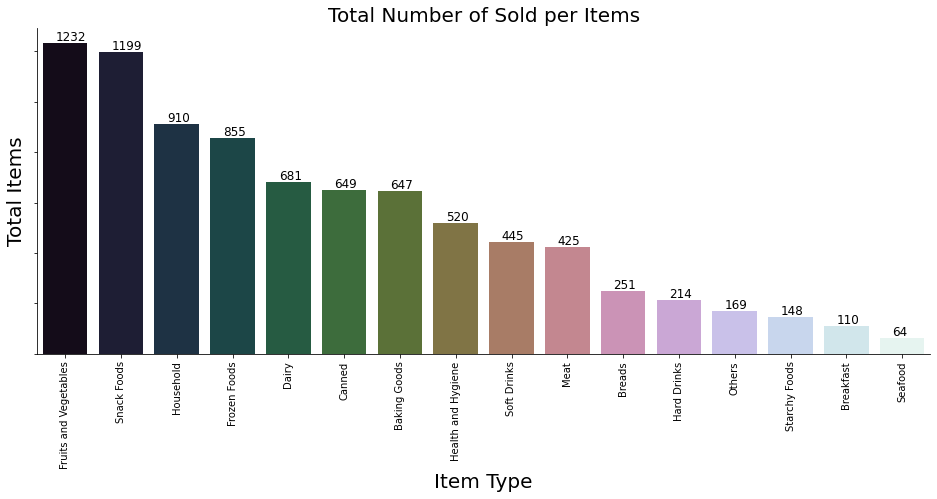

In [36]:
# Subplots and figure size
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (16 ,6));
# Bar Graph
g = sns.barplot(items.index, items.values, palette = 'cubehelix');

# deal with the scientific notation
for i in ['top', 'right']:
    g.spines[i].set_visible(False);

# Display value at the top of the bar      
for i in g.patches:
    g.text(i.get_x()+i.get_width()/3.5,
           i.get_height()+10,
           round(i.get_height()),
           fontsize=12);
# Ticklabel format           
plt.ticklabel_format(style='plain', axis='y');
#xticks
plt.xticks(rotation = 90);
#xlabel
plt.xlabel('Item Type', fontsize = 20);
#ylabel
plt.ylabel('Total Items', fontsize = 20);
#yticklabel empty
g.set(yticklabels=[]);
#title
plt.title('Total Number of Sold per Items', fontsize = 20);

## Code and Graph below will show the Total sales percentage by Outlet Location and Outlet Type. From the Donut Graph below it shows that outlet location *Tier 2* and outlet type *Supermarket 1* has the highest sales combination.

In [37]:
# Groupby columns
pie = df.groupby(['Outlet_Location_Type', 'Outlet_Type'])['Item_Outlet_Sales'].sum()
pie

Outlet_Location_Type  Outlet_Type      
Tier 1                Grocery Store        1.795736e+05
                      Supermarket Type1    4.302365e+06
Tier 2                Supermarket Type1    6.472314e+06
Tier 3                Grocery Store        1.883402e+05
                      Supermarket Type1    2.142664e+06
                      Supermarket Type2    1.851823e+06
                      Supermarket Type3    3.444468e+06
Name: Item_Outlet_Sales, dtype: float64

Code below computes the sum of Sales per Outlet location and Type

In [38]:
# Filter
filter1 = (df['Outlet_Location_Type'] == 'Tier 1') & (df['Outlet_Type'] == 'Grocery Store')
# sum of Column item Outlet Sales
t1_g1 = df[filter1]['Item_Outlet_Sales'].sum()
filter2 = (df['Outlet_Location_Type'] == 'Tier 1') & (df['Outlet_Type'] == 'Supermarket Type1')
t1_sm1 = df[filter2]['Item_Outlet_Sales'].sum()
filter3 = (df['Outlet_Location_Type'] == 'Tier 2') & (df['Outlet_Type'] == 'Supermarket Type1')
t2_sm1 = df[filter3]['Item_Outlet_Sales'].sum()
filter4 = (df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Grocery Store')
t3_g1 = df[filter4]['Item_Outlet_Sales'].sum()
filter5 = (df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Supermarket Type1')
t3_sm1 = df[filter5]['Item_Outlet_Sales'].sum()
filter6 = (df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Supermarket Type2')
t3_sm2 = df[filter6]['Item_Outlet_Sales'].sum()
filter7 = (df['Outlet_Location_Type'] == 'Tier 3') & (df['Outlet_Type'] == 'Supermarket Type2')
t3_sm3 = df[filter7]['Item_Outlet_Sales'].sum()

Code below compute the Total sum of Sales per Outlet Location Type.
As well make a LIST to be used as labels in our graph.

In [39]:
# Sum 
t1 = t1_g1 + t1_sm1
t2 = t2_sm1
t3 = t3_g1 + t3_sm1 + t3_sm2 + t3_sm3
# make List
sum_per_tier = [t1, t2, t3]

In [40]:
# make a List
sales_loc_type = [t1_g1, t1_sm1, t2_sm1, t3_g1, t3_sm1, t3_sm2, t3_sm3]

In [41]:
# make a List
rename = ['Grocery Store',
          'Supermarket Type1',
          'Supermarket Type1',
          'Grocery Store',
          'Supermarket Type',
          'Supermarket Type2',
          ' Supermarket Type3']

Code below will create a 2 Donut Chart that will show the total percentage of sales per Outlet Location Type and Outlet Type

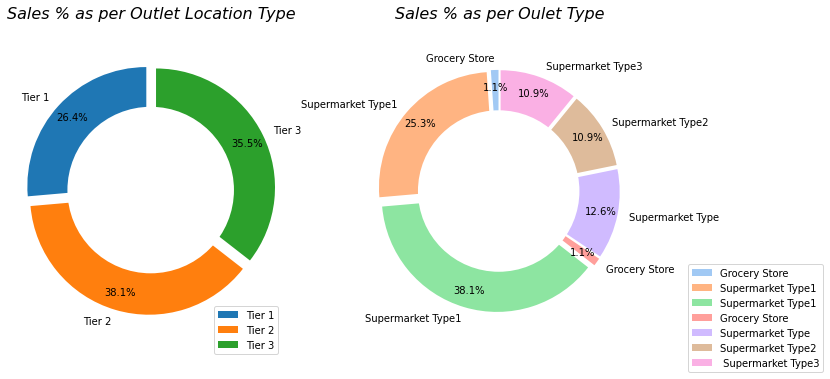

In [42]:
# Figure Size
plt.rcParams['figure.figsize'] = (10, 10)
# Subplot
plt.subplot(2, 2, 1)
# labels
labels = df['Outlet_Location_Type'].value_counts().sort_index()
tier_labels = labels.index
tier_labels
#colors
colors = sns.color_palette('tab10')
#explosion
explode = (0.05, 0.05, 0.05)
# Pie chart
plt.pie(sum_per_tier,
        labels = tier_labels,
        colors = colors,
        radius= 1,
        autopct = '%1.1f%%',
        pctdistance = 0.85,
        startangle = 90,
        explode = explode);
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
#legend location
plt.legend(loc = 4)
plt.title('Sales % as per Outlet Location Type', fontsize = 16, fontstyle = 'italic')


# Subplot
plt.subplot(2, 2, 2)
#colors
colors_outlet_type = sns.color_palette('pastel');
#explsion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05);
# Pie chart
plt.pie(sales_loc_type,
        labels = rename,
        colors=colors_outlet_type,
        radius= 1,
        autopct='%1.1f%%',
        pctdistance=0.85,
        startangle=90,
        explode = explode);
# Draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white');
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
# legend location
plt.legend(bbox_to_anchor = (1.75, 0.3))
# Title 
plt.title('Sales % as per Oulet Type',
          fontsize = 16,
          fontstyle = 'italic');

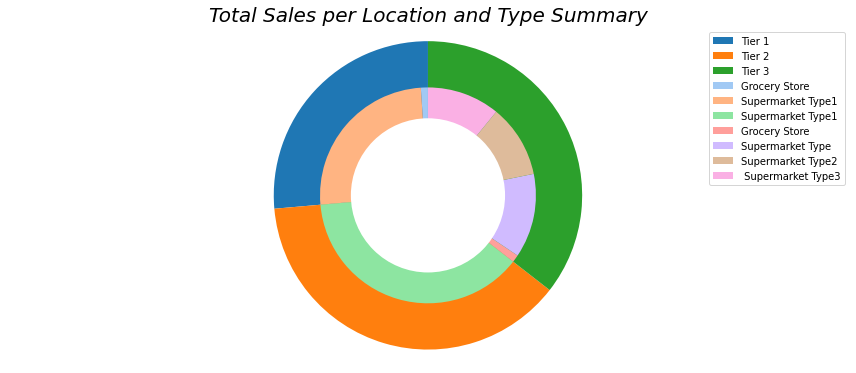

In [43]:
# Figure Size
plt.rcParams['figure.figsize'] = (12, 5)
# Colors
colors = sns.color_palette('tab10');
colors_outlet_type = sns.color_palette('pastel');
# labels
labels = ['Tier 1', 'Tier 2', 'Tier 3'];
# Plot
plt.pie(sum_per_tier,
        labels = tier_labels
        , labeldistance = None,
        colors = colors,
        radius = 1,
        textprops = {'color': 'k','fontsize': 20},
        startangle = 90,
        frame = True);
plt.pie(sales_loc_type,
        labels = rename,
        labeldistance = None,
        colors = colors_outlet_type,
        radius= 0.7,
        startangle = 90)
# Draw circle
centre_circle = plt.Circle((0,0),0.5,
                           color = 'black',
                           fc = 'white',
                           linewidth = 0);
fig = plt.gcf()
fig.gca().add_artist(centre_circle);
 # Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal');
plt.tight_layout();
# legend location
plt.legend(bbox_to_anchor = (1, 1));
# Title 
plt.title('Total Sales per Location and Type Summary',
          fontsize = 20,
          fontstyle = 'italic');


# Project 1 - Part 5 (Core)

Below Diagram will be our guide for our Feature Engineering Workflow

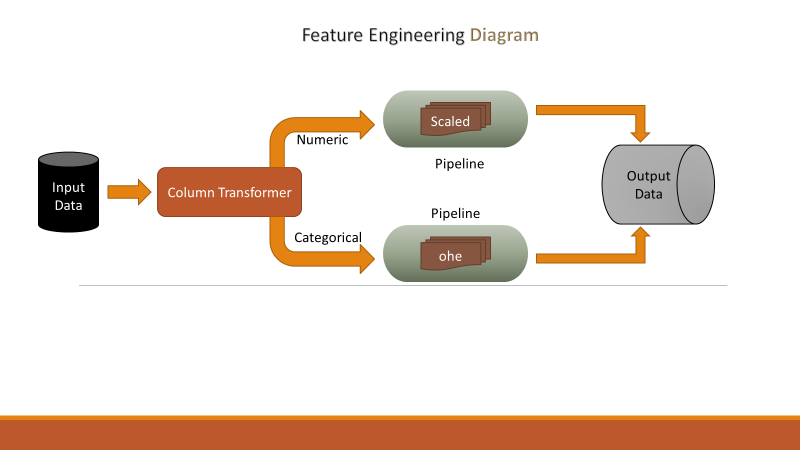

## Identify the target (X) and features (y): Assign the "Item_Outlet_Sales" column as your target and the rest of the relevant variables as your features matrix.  

In [44]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8519 non-null   object 
 1   Item_Fat_Content           8519 non-null   object 
 2   Item_Visibility            8519 non-null   float64
 3   Item_Type                  8519 non-null   object 
 4   Item_MRP                   8519 non-null   float64
 5   Outlet_Identifier          8519 non-null   object 
 6   Outlet_Establishment_Year  8519 non-null   int64  
 7   Outlet_Size                8519 non-null   object 
 8   Outlet_Location_Type       8519 non-null   object 
 9   Outlet_Type                8519 non-null   object 
 10  Item_Outlet_Sales          8519 non-null   float64
 11  Item_Weight                8519 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 865.2+ KB


In [45]:
# diplay columns
df.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


Perfrom Ordinal Encoding on column Outlet_Size

In [46]:
# check values in column
df['Outlet_Size'].value_counts()

Small     4797
Medium    2790
High       932
Name: Outlet_Size, dtype: int64

In [47]:
# Ordinal Encoding
df['Outlet_Size'] = df['Outlet_Size'].replace({'Small': 0, 'Medium': 1, 'High':2})
df['Outlet_Size'].value_counts()

0    4797
1    2790
2     932
Name: Outlet_Size, dtype: int64

## Perform a train test split 

Features, Target and Split

In [48]:
# assign feature as variable X and target as variable y
X = df.drop('Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales']
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

### Create a pre processing pipeline to prepare the dataset for Machine Learning

Instantiate column selectors

In [49]:
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')

Instantiate Transformers

In [50]:
# Scale
scaler = StandardScaler()
# OneHotEncoder
ohe = OneHotEncoder(handle_unknown = 'ignore', sparse = False)

Instantiate Pipelines

In [51]:
# numerical pipeline
num_pipe = make_pipeline(scaler)
num_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [52]:
#categorical pipeline
cat_pipe = make_pipeline(ohe)
cat_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

Instantiate ColumnTransformer

In [53]:
# create tuple for numerical and categorical
num_tuple = (num_pipe, num_selector)
cat_tuple = (cat_pipe, cat_selector)
# Column Transformer
preprocessor = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7020339490>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7020339d90>)])

## fit on train


In [54]:
# fit on train
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7020339490>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f7020339d90>)])

Transform Train and Test

In [55]:
# transform train and test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)
# result in Numpy array
X_train_processed

array([[-0.70557556,  1.83797352,  1.3320594 , ...,  0.        ,
         1.        ,  0.        ],
       [ 1.30400847, -0.28141255, -1.53516775, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.3463181 ,  1.69116347,  0.13738142, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.08837392, -0.74905057, -0.10155417, ...,  1.        ,
         0.        ,  0.        ],
       [-0.22039966, -0.37557106,  1.09312381, ...,  1.        ,
         0.        ,  0.        ],
       [-1.28403877, -0.51653555,  1.09312381, ...,  1.        ,
         0.        ,  0.        ]])

In [56]:
# from scipy import stats
# for arr in X_train_processed: #do not need the loop at this point, but looks prettier
#     print(stats.describe(arr))

# Project 1 - Final (Core)

## 1) Your first task is to build a linear regression model to predict sales.

*    Build a linear regression model.

In [57]:
# Make an instance of the model
reg = LinearRegression()

Model is learning the relationship between X and y

In [58]:
# Fit to the model
reg.fit(X_train_processed, y_train)

LinearRegression()

Obtaining the predictions

In [59]:
# to obtrain the predictions of the train set
train_preds = reg.predict(X_train_processed)
# To obtain the predictions of the test set
test_preds = reg.predict(X_test_processed)
train_preds

array([2683.5 ,  -74.75, 3969.5 , ..., 1627.25, 1108.5 , 1610.  ])

*    Evaluate the performance of your model based on r^2.

In [60]:
#value of r^2 
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
# value of r^2 for train
# print(f'r2_train:', r2_train,'\n')
# print(f'r2_test:', r2_test,'\n')
r2_train

0.6709903073099658

In [61]:
# test score
r2_test

-4.2201613882650107e+18

*    Evaluate the performance of your model based on rmse.

In [62]:
# Root mean squared error for test and train
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
# print(f'rmse_train:', rmse_train, '\n')
# print(f'rmse_test:', rmse_test)
rmse_train

980.6157803099394

In [63]:
# test score
rmse_test

3485131217171.3228

## 2) Your second task is to build a regression tree model to predict sales.

*    Build a simple regression tree model.

check for the optimal value of max_depth

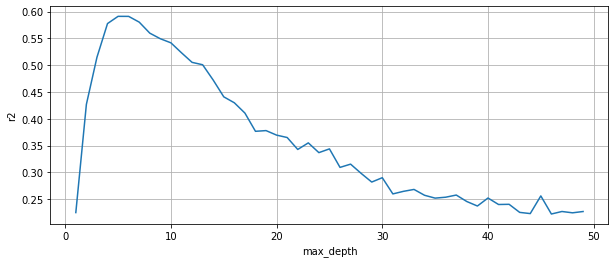

In [64]:
# List of values to try for max_depth:
max_depth_range = list(range(1,50)) # will try every value between 0 and 50
# List to store the score for each value of max_depth
r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth,
                                     random_state = 42)
    dec_tree.fit(X_train_processed, y_train)
    score = dec_tree.score(X_test_processed, y_test)
    r2.append(score)

# Visualize which max_depth leads to the highest r2 score
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 4)
plt.plot(max_depth_range, r2)
plt.xlabel('max_depth')
plt.ylabel('r2')
plt.grid()
plt.show()

From code below max_depth = 5 is the optimal value for this model

In [65]:
val = tuple(zip(max_depth_range, r2))
opt = pd.DataFrame(val, columns = ['max_depth_range', 'r2'])
opt[opt['r2'] == max(opt['r2'])]

,max_depth_range,r2
4,5,0.591169


onther method to find the max_depth by using DICT

In [66]:
# using naive method
# to convert lists to dictionary
res = {}
for key in max_depth_range:
    for value in r2:
        res[key] = value
        r2.remove(value)
        break  
  
# Printing resultant dictionary 
print ('DICT : ' +  str(res))

DICT : {1: 0.22519655543114314, 2: 0.42698292892866274, 3: 0.5148240695054436, 4: 0.5776914204372343, 5: 0.5911691080162262, 6: 0.5910866136083895, 7: 0.5803581425445994, 8: 0.5598184378767399, 9: 0.5493594188080496, 10: 0.5417396020181844, 11: 0.5231822362620224, 12: 0.505359404100097, 13: 0.5008844840453461, 14: 0.4723314989570129, 15: 0.4410633798032554, 16: 0.42995965518936674, 17: 0.410772674599579, 18: 0.37676422260808773, 19: 0.3780873952313629, 20: 0.3696351694306109, 21: 0.36518173361875783, 22: 0.3429115039180568, 23: 0.355176786728838, 24: 0.33700298271140783, 25: 0.34398125923264955, 26: 0.3094651913179368, 27: 0.31554943855832185, 28: 0.2982855955891204, 29: 0.28212210153068384, 30: 0.29024723781097483, 31: 0.2600121202314165, 32: 0.2648046610795852, 33: 0.2683697332528783, 34: 0.2574577229097258, 35: 0.252153732621772, 36: 0.2538785490759988, 37: 0.25790087332572365, 38: 0.2458033988461552, 39: 0.2374385678074491, 40: 0.25236258253337684, 41: 0.2402791318669849, 42: 0.240

In [67]:
str(res)

'{1: 0.22519655543114314, 2: 0.42698292892866274, 3: 0.5148240695054436, 4: 0.5776914204372343, 5: 0.5911691080162262, 6: 0.5910866136083895, 7: 0.5803581425445994, 8: 0.5598184378767399, 9: 0.5493594188080496, 10: 0.5417396020181844, 11: 0.5231822362620224, 12: 0.505359404100097, 13: 0.5008844840453461, 14: 0.4723314989570129, 15: 0.4410633798032554, 16: 0.42995965518936674, 17: 0.410772674599579, 18: 0.37676422260808773, 19: 0.3780873952313629, 20: 0.3696351694306109, 21: 0.36518173361875783, 22: 0.3429115039180568, 23: 0.355176786728838, 24: 0.33700298271140783, 25: 0.34398125923264955, 26: 0.3094651913179368, 27: 0.31554943855832185, 28: 0.2982855955891204, 29: 0.28212210153068384, 30: 0.29024723781097483, 31: 0.2600121202314165, 32: 0.2648046610795852, 33: 0.2683697332528783, 34: 0.2574577229097258, 35: 0.252153732621772, 36: 0.2538785490759988, 37: 0.25790087332572365, 38: 0.2458033988461552, 39: 0.2374385678074491, 40: 0.25236258253337684, 41: 0.2402791318669849, 42: 0.240624739

Make an instance of the Model using max_depth = 5 as the optimal value

In [68]:
# Instanstiate the model
dec_tree = DecisionTreeRegressor(max_depth =5, random_state = 42)

 Fit the model using your training data.  The model is learning the relationship between the features (X) and the target (y).


In [69]:
# Fit to the model
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

Predict the target values for the training set and the test test.

In [70]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

print(f'train_preds:', train_preds, '\n')
print(f'test_preds:', test_preds, '\n')

train_preds: [3210.50410744  291.57790213 3941.85506759 ... 1525.45153462 1996.76414603
 1525.45153462] 

test_preds: [1996.76414603 1525.45153462  227.32824966 ... 1525.45153462 3941.85506759
 3210.50410744] 



Evaluate the Model

*    Compare the performance of your model based on r^2.

In [71]:
#value of r^2 
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)
# value of r^2 for train

# print(f'r2_train:', r2_train,'\n')
# print(f'r2_test:', r2_test,'\n')
r2_train

0.6058569565835543

In [72]:
# test score
r2_test

0.5911691080162262

*    Compare the performance of your model based on rmse.  

In [73]:
# Root mean squared error for test and train
rmse_train = np.sqrt(mean_squared_error(y_train, train_preds))
rmse_test = np.sqrt(mean_squared_error(y_test, test_preds))
# value of r^2 for train
# print(f'rmse_train:', rmse_train, '\n')
# print(f'rmse_test:', rmse_test)
rmse_train

1073.300827825967

In [74]:
# test score
rmse_test

1084.742001697323

## 3) You now have tried 2 different models on your data set. You need to determine which model to implement.


*    Overall, which model do you recommend?

I would recommend using the the Random Forest Model for this for this project

*    Justify your recommendation.

From the result we can see that "Random Forest Model" has a better score result on the test data compared to Linear Regression Model.

## 4) To finalize this project, you need to prepare an executive (non-technical) presentation about your project.

*    Create a slide deck for a non-technical audience presenting this data, your analysis, and model recommendations.
*    Do not include data cleaning, pre-processing, or exploration steps in your presentation.
*    Do include 2 insights from your analysis supported with appropriate "reporting" quality visuals.
*    Prepare a short (5 minute) audio presentation using your slides (Google Slides, PowePoint, etc). 
*    Record yourself giving this presentation. Feel free to use any software available (Zoom, OBS, etc.). Include this recording on your GitHub repo.  Your presentation requires audio, but video is optional.
*    Finalize your README with an overview of the project, an explanation of the data (including visualizations), and a summary of the results and recommendations. Think of this as an executive summary or an overview of your project.
*    Make sure your GitHub repository is organized and professional. Remember, this should be used to showcase your data science skills and abilities.
*    Commit all of your work to GitHub and turn in a link to your GitHub repo with your final project. Make sure you include your presentation slides and recording on your GitHub repo as well.

Below code wil concatenate prediction results( train_preds, test_preds) with our original split data set(X_train, X_test) to create a visualization for our prediction sales.